In [ ]:
"""
Name : Aman Jha
Roll Number : 2k18/IT/018
Date : 01-04-2021
Lab : DL Lab
"""

'\nName : Aman Jha\nRoll Number : 2k18/IT/018\nDate : 01-04-2021\nLab : DL Lab\n'

# CIFAR 10 Dataset

- number of images : 60K

- Size : 32x32 pixels ( 1024 Pixels )

- No. of Classes : 10

- Classes = [ airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck]

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10

# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [ ]:
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()

  print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
  print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

In [ ]:
def define_model():
  model = Sequential()
  model.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2),strides=(1,1)))
  model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same',strides=(2,2)))
  model.add(MaxPooling2D((2, 2),strides=(2,2)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(1,1)))
  model.add(MaxPooling2D((3, 3),strides=(1,1)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  pyplot.close()

In [ ]:
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  # fit model
  history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=2)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # learning curves
  summarize_diagnostics(history)

In [ ]:
run_test_harness()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Epoch 1/50
782/782 - 51s - loss: 1.8733 - accuracy: 0.3249 - val_loss: 1.6580 - val_accuracy: 0.3915
Epoch 2/50
782/782 - 51s - loss: 1.5624 - accuracy: 0.4347 - val_loss: 1.4557 - val_accuracy: 0.4756
Epoch 3/50
782/782 - 51s - loss: 1.4215 - accuracy: 0.4877 - val_loss: 1.3793 - val_accuracy: 0.5016
Epoch 4/50
782/782 - 51s - loss: 1.3271 - accuracy: 0.5262 - val_loss: 1.3001 - val_accuracy: 0.5343
Epoch 5/50
782/782 - 51s - loss: 1.2581 - accuracy: 0.5526 - val_loss: 1.2104 - val_accuracy: 0.5737
Epoch 6/50
782/782 - 51s - loss: 1.1993 - accuracy: 0.5746 - val_loss: 1.2096 - val_accuracy: 0.5730
Epoch 7/50
782/782 - 51s - loss: 1.1339 - accuracy: 0.5979 - val_loss: 1.1218 - val_accuracy: 0.6057
Epoch 8/50
782/782 - 51s - loss: 1.0891 - accuracy: 0.6142 - val_loss: 1.1237 - val_accuracy: 0.6013
Epoch 9/50
782/782 - 51s - loss: 1.0496 - accuracy: 0.6304 - val_loss: 1.1008 - val_accuracy: 0.6093
Epoch 10

Populating the interactive namespace from numpy and matplotlib


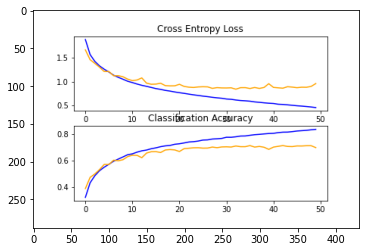

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/ipykernel_launcher.py_plot.png')
imgplot = plt.imshow(img)
plt.show()